# Logistic Regression

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load Data

In [2]:
random_seed = 44
num_cols = ["Term","NoEmp","SecuredSBA","GrDisburs","GrApprov","ApprovSBA"]
target = ["Default"]

In [3]:
df = pd.read_csv("sba_clean.csv")
df

,State,BankState,DifState,Sector,AppYear,AppMonth,Term,NoEmp,Secured,NewExist,Urban,Rural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
0,15,38,1,16,30,2,84,4,0,1,0,0,0,1,60000,60000,48000,80,0
1,15,18,0,0,30,2,60,2,0,1,0,0,0,1,40000,40000,32000,80,0
2,15,18,0,7,30,2,180,7,0,0,0,0,0,0,287000,287000,215250,75,0
3,36,39,0,20,30,2,60,2,0,0,0,0,0,1,35000,35000,28000,80,0
4,9,11,0,20,30,2,240,14,1,0,0,0,0,0,229000,229000,229000,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894605,35,17,1,16,30,2,60,6,0,0,0,0,0,0,70000,70000,56000,80,0
894606,35,17,1,16,30,2,60,6,0,0,0,0,1,0,85000,85000,42500,50,0
894607,4,5,0,10,30,2,108,26,0,0,0,0,0,0,300000,300000,225000,75,0
894608,11,14,0,20,30,2,60,6,0,0,0,0,0,1,75000,75000,60000,80,1


## Scaling

**Min-Max Scaling**

Algoritmos sensibles a la escala, como k-Nearest Neighbors (k-NN) y redes neuronales con funciones de activación basadas en distancias (como la función sigmoide), pueden beneficiarse de la normalización.

In [ ]:
# scaler = MinMaxScaler()
# df[num_cols] = scaler.fit_transform(df[num_cols])

# df.sample(3)

**Z-Score Scaling**

Algunos algoritmos, como la Regresión Logística y el Support Vector Machine (SVM), funcionan mejor con datos estandarizados, ya que asumen una distribución normal.

In [4]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.sample(3)

,State,BankState,DifState,Sector,AppYear,AppMonth,Term,NoEmp,Secured,NewExist,Urban,Rural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
746511,19,43,1,13,37,9,-0.340847,-0.127637,0,0,1,0,1,0,-0.404200,-0.558625,-0.579686,-1.208265,0
795755,4,5,0,20,28,8,2.394339,-0.127637,1,0,0,0,0,0,-0.553836,-0.532182,-0.488958,1.094763,0
555895,23,26,0,10,26,1,0.659522,0.021227,0,0,0,0,0,0,-0.128845,-0.100266,-0.042971,0.806884,0


## Split Data

In [5]:
X = df.drop(columns=target)
y = df[target[0]]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=random_seed)

In [7]:
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test:  {X_test.shape}, {y_test.shape}")

Train: (626227, 18), (626227,)
Test:  (268383, 18), (268383,)


## Train Model

In [67]:
log_reg = LogisticRegression()

In [68]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100],
              "penalty": ["l1", "l2", "elasticnet"],
              "random_state": [random_seed]}

In [ ]:
grid_lr = GridSearchCV(log_reg, param_grid, cv=10)
grid_lr.fit(X_train, y_train)

In [11]:
params = grid_lr.best_params_

print("Better Parameters:", params)

Better Parameters: {'C': 0.1, 'penalty': 'l2', 'random_state': 44}


In [71]:
lr_model = LogisticRegression(C=params["C"], penalty=params["penalty"],
                              random_state=params["random_state"], max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=44)

In [72]:
acc_lr = lr_model.score(X_test, y_test)
print("Accuracy:", round(acc_lr, 4))

Accuracy: 0.8542


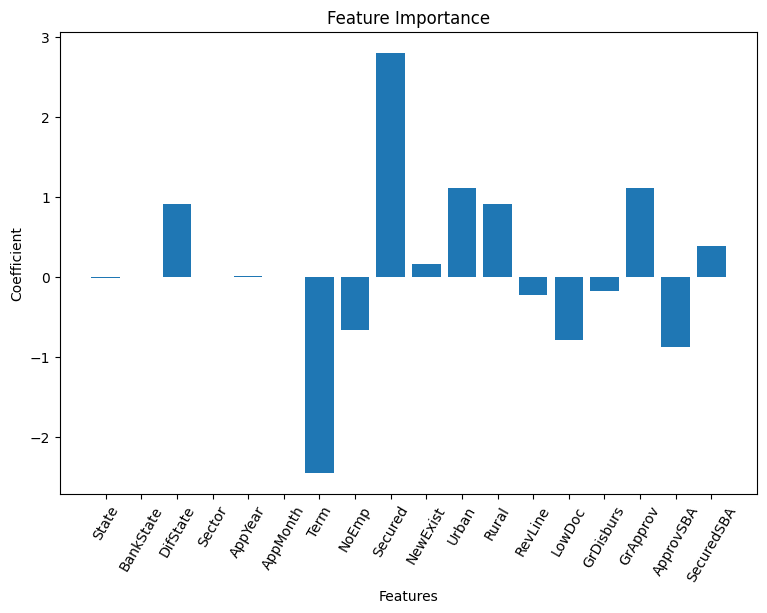

In [145]:
coef_lr = lr_model.coef_[0]
X_cols = X_train.columns

plt.figure(figsize=(9, 6))
plt.bar(X_cols, coef_lr)

plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.xticks(rotation=60)
plt.show()

In [ ]:
# probabilidades = lm.predict_proba(X_test)
# probabilidades[:,1]

In [ ]:
# #p <= 0.5 => 0, p > 0.5 => 1")
# predicciones = lm.predict(X_test)
# predicciones

In [146]:
# #p <= 0.1 => 0, p > 0.1 => 1")
# dfP = pd.DataFrame(probabilidades[:,1])
# limite = 0.1
# dfP["prediccion"] = np.where(dfP[0] > limite, 1, 0)
# dfP.head()

In [ ]:
# pd.crosstab(dfP.prediccion, columns="count")

In [ ]:
# 390 / len(dfP) * 100

In [ ]:
# limite = 0.25
# dfP["prediccion"] = np.where(dfP[0] > limite, 1, 0)
# pd.crosstab(dfP.prediccion, columns="count")

In [ ]:
# 118 / len(dfP) * 100

In [ ]:
# metrics.accuracy_score(Y_test, predicciones)

## Apply RFE

In [74]:
lr_ref = LogisticRegression(C=params["C"], penalty=params["penalty"],
                            random_state=params["random_state"], max_iter=1000)

In [134]:
rfe_lr = RFE(lr_ref)
rfe_lr.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=0.1, max_iter=1000, random_state=44))

In [135]:
rfe_mat = list(zip(X_train.columns.values.tolist(), rfe_lr.support_, rfe_lr.ranking_))
rfe_mat

[('State', False, 6),
 ('BankState', False, 8),
 ('DifState', True, 1),
 ('Sector', False, 9),
 ('AppYear', False, 7),
 ('AppMonth', False, 10),
 ('Term', True, 1),
 ('NoEmp', True, 1),
 ('Secured', True, 1),
 ('NewExist', False, 5),
 ('Urban', True, 1),
 ('Rural', True, 1),
 ('RevLine', False, 3),
 ('LowDoc', True, 1),
 ('GrDisburs', False, 4),
 ('GrApprov', True, 1),
 ('ApprovSBA', True, 1),
 ('SecuredSBA', False, 2)]

In [136]:
sel_cols = [tupla[1] for tupla in rfe_mat]
X_train.loc[:,sel_cols].columns

Index(['DifState', 'Term', 'NoEmp', 'Secured', 'Urban', 'Rural', 'LowDoc',
       'GrApprov', 'ApprovSBA'],
      dtype='object')

In [137]:
lr_ref.fit(X_train.loc[:,sel_cols], y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=44)

In [138]:
y_ref = lr_ref.predict(X_test.loc[:,sel_cols])

In [139]:
acc_ref = accuracy_score(y_test, y_ref)

print("Accuracy:", round(acc_ref, 4))

Accuracy: 0.847


## Cross-Validation

In [14]:
results = cross_val_score(lr_model, X_train, y_train, cv=10)

print("Results:", results)
print("Accuracy (mean +/- desv): %0.4f +/- %0.4f" % (results.mean(), results.std()))

Results: [0.85452629 0.85516504 0.85588362 0.85514907 0.85467001 0.85444645
 0.85676189 0.85292709 0.85586535 0.85495513]
Accuracy (mean +/- desv): 0.8550 +/- 0.0010


In [15]:
y_cv = cross_val_predict(lr_model, X, y, cv=10)
acc_cv = accuracy_score(y, y_cv)

print("Accuracy:", round(acc_cv, 4))

Accuracy: 0.8517


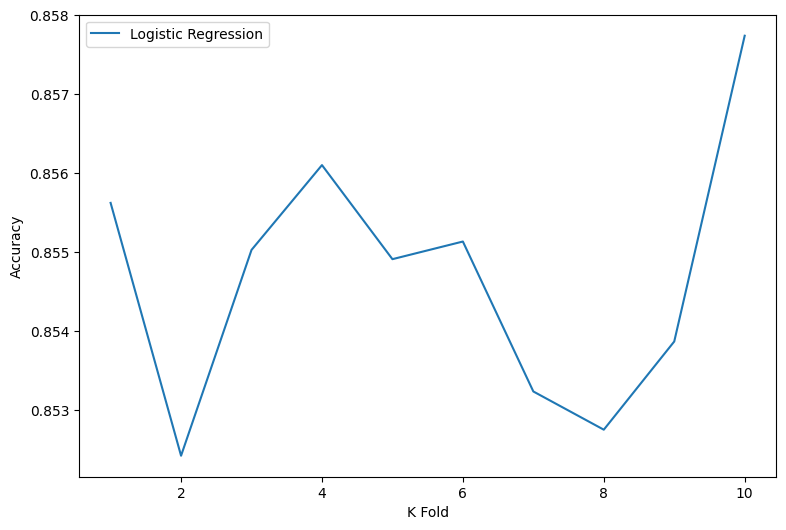

In [144]:
kf = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(lr_model, X_test, y_test, cv=kf, scoring="accuracy")

plt.figure(figsize=(9, 6))
plt.plot(range(1, 11), scores, label="Logistic Regression")

plt.xlabel("K Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Metrics

In [17]:
y_pred = lr_model.predict(X_test)

In [18]:
print("Exactitud:    %.4f" % (accuracy_score(y_test, y_pred)))
print("Precisión:    %.4f" % (precision_score(y_test, y_pred, average="macro")))
print("Sensibilidad: %.4f" % (recall_score(y_test, y_pred, average="macro")))
print("F1-score:     %.4f" % (f1_score(y_test, y_pred, average="macro")))

Exactitud:    0.8542
Precisión:    0.7850
Sensibilidad: 0.6389
F1-score:     0.6713


In [19]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8667    0.9722    0.9165    220842
           1     0.7033    0.3056    0.4261     47541

    accuracy                         0.8542    268383
   macro avg     0.7850    0.6389    0.6713    268383
weighted avg     0.8378    0.8542    0.8296    268383



In [20]:
cm_lr = confusion_matrix(y_test, y_pred, normalize="all")
print(cm_lr)

[[0.80001714 0.02284422]
 [0.12299959 0.05413905]]


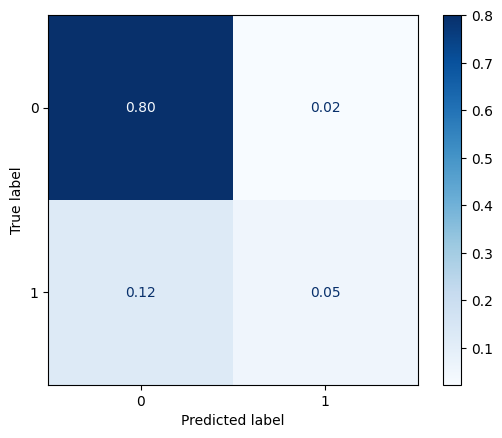

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                              display_labels=lr_model.classes_)
disp.plot(cmap="Blues", values_format=".2f")

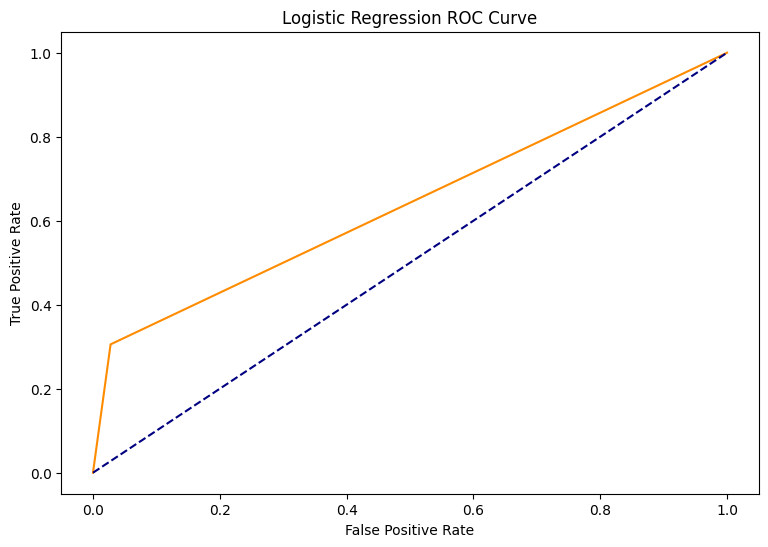

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(9, 6))
plt.plot(fpr, tpr, color="darkorange", label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

## Interpretability

In [133]:
# explainer = shap.TreeExplainer(lr_model)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values[1], X_test)

## Model Pipelines